In [69]:
import cv2
import matplotlib.pyplot as plt

In [70]:
haar_path = cv2.data.haarcascades
face_cascade = cv2.CascadeClassifier(haar_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(haar_path + 'haarcascade_eye.xml')
full_body_cascade = cv2.CascadeClassifier(haar_path + 'haarcascade_fullbody.xml')
upper_body_cascade = cv2.CascadeClassifier(haar_path + 'haarcascade_upperbody.xml')
lower_body_cascade = cv2.CascadeClassifier(haar_path + 'haarcascade_lowerbody.xml')

In [71]:
def detect_features(image_path):
    """Detects face, eyes, full body, upper body, and lower body in an image."""
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image!")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [72]:
def detect_features(image_paths):
    """Detects face, eyes, full body, upper body, and lower body in multiple images."""
    
    if isinstance(image_paths, str):  # If single image path is given, convert to list
        image_paths = [image_paths]

    for image_path in image_paths:
        print(f"Processing: {image_path}")

        # Load the image in grayscale
        image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image_gray is None:
            print(f"❌ Error: Could not read image '{image_path}'! Check the file path.")
            continue  # Skip this image and move to the next

        # Load the original color image
        image_color = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

        # Create a copy for drawing rectangles (since rectangles require a 3-channel image)
        image_with_rectangles = image_color.copy()

        # Detect Face
        faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (x, y, w, h) in faces:
            cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue for face

            # Detect Eyes in the Face Region
            roi_gray = image_gray[y:y+h, x:x+w]
            roi_color = image_with_rectangles[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 255), 2)  # Yellow for eyes

        # Detect Full Body
        bodies = full_body_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
        for (bx, by, bw, bh) in bodies:
            cv2.rectangle(image_with_rectangles, (bx, by), (bx + bw, by + bh), (0, 255, 0), 2)  # Green for full body

        # Detect Upper Body
        upper_bodies = upper_body_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
        for (ux, uy, uw, uh) in upper_bodies:
            cv2.rectangle(image_with_rectangles, (ux, uy), (ux + uw, uy + uh), (255, 165, 0), 2)  # Orange for upper body

        # Detect Lower Body
        lower_bodies = lower_body_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
        for (lx, ly, lw, lh) in lower_bodies:
            cv2.rectangle(image_with_rectangles, (lx, ly), (lx + lw, ly + lh), (128, 0, 128), 2)  # Purple for lower body

        # Convert the modified image to grayscale for grayscale output
        final_image_gray = cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2GRAY)

        # Convert the modified image to RGB for RGB output
        final_image_rgb = cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB)

        # Display both grayscale and RGB images
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        axes[0].imshow(final_image_gray, cmap="gray")
        axes[0].set_title("Grayscale Detection Output")
        axes[0].axis('off')

        axes[1].imshow(final_image_rgb)
        axes[1].set_title("RGB Detection Output")
        axes[1].axis('off')

        plt.show()

Processing: C:\Users\Admin\Downloads\avengers.jpg


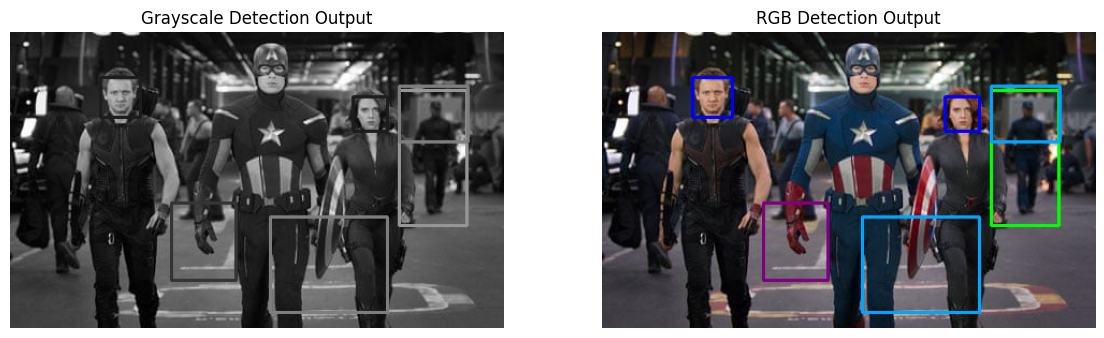

Processing: C:\Users\Admin\Downloads\avengers2.jpg


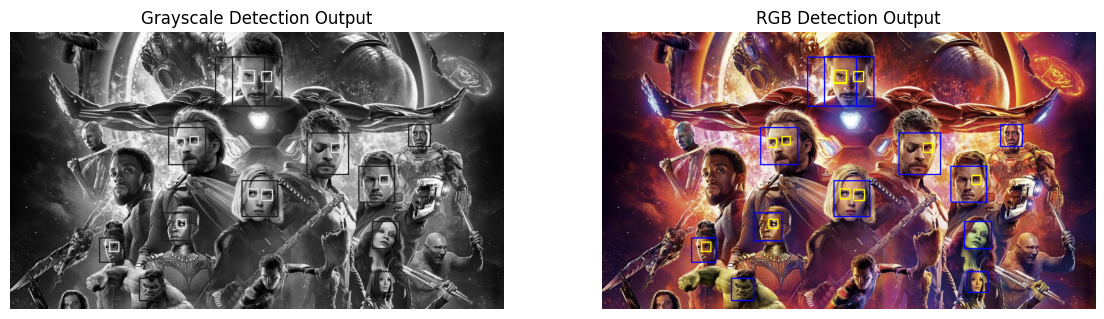

In [73]:
image_paths = [
    "C:\\Users\\Admin\\Downloads\\avengers.jpg",
    "C:\\Users\\Admin\\Downloads\\avengers2.jpg"
]  
detect_features(image_paths)

In [74]:
def detect_faces_only(image_path):
    """Detects only faces in an image."""
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image!")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect Face
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue for face

    # Convert BGR to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show Image with Detections
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [75]:
#image_path = "C:\\Users\\Admin\\Downloads\\optimize2.jpg"  # Replace with a real image path
#detect_faces_only(image_path)


In [76]:
def detect_from_webcam():
    """Detects face, eyes, full body, upper body, and lower body using a webcam feed."""
    
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print(" Error: Unable to access webcam")
        return

    print("Press 'q' to exit")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print(" Error: Failed to capture frame")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect Face
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue for face

            # Detect Eyes
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 255), 2)  # Yellow for eyes

        # Detect Full Body
       # bodies = full_body_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
       # for (bx, by, bw, bh) in bodies:
         #   cv2.rectangle(frame, (bx, by), (bx + bw, by + bh), (0, 255, 0), 2)  # Green for full body

        # Detect Upper Body
       # upper_bodies = upper_body_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
       # for (ux, uy, uw, uh) in upper_bodies:
        #    cv2.rectangle(frame, (ux, uy), (ux + uw, uy + uh), (255, 165, 0), 2)  # Orange for upper body

        # Detect Lower Body
       # lower_bodies = lower_body_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
       # for (lx, ly, lw, lh) in lower_bodies:
        #    cv2.rectangle(frame, (lx, ly), (lx + lw, ly + lh), (128, 0, 128), 2)  # Purple for lower body

        # Display the Frame
        cv2.imshow("Webcam Detection", frame)

        # Exit loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release Resources
    cap.release()
    cv2.destroyAllWindows()


In [77]:
detect_from_webcam()


Press 'q' to exit
